Testing ideas on Clutter and DoD

In [1]:
import pyart
import os
import numpy as np
from matplotlib import pyplot as plt
import netCDF4 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119 


In [2]:
filename = '/data/radar/oli_kazr/olikazrmdM1.a1.20160715.005038.nc'

In [3]:
radar = pyart.io.read(filename)

In [4]:
my_display = pyart.graph.RadarDisplay(radar)

In [5]:
print(radar.fields.keys())

[u'snr_copol', u'co_to_crosspol_correlation_coeff', u'spectral_width', u'mean_doppler_velocity', u'reflectivity', u'snr_xpol', u'linear_depolarization_ratio']


(0, 15)

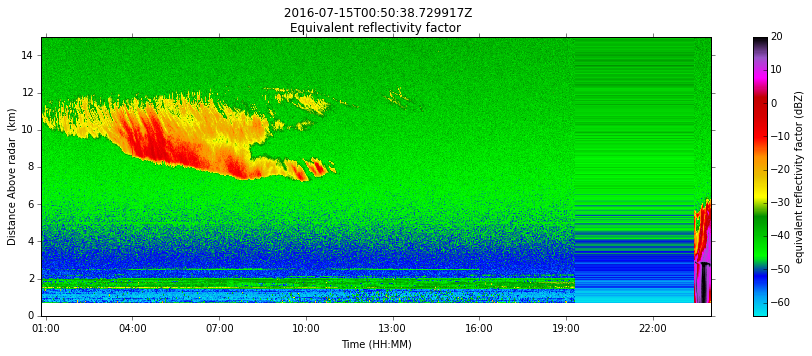

In [6]:
my_fig = plt.figure(figsize = [15,5])
my_display.plot_vpt('reflectivity', vmin=-64, 
                    vmax=20, time_axis_flag=True)
plt.ylim([0,15])

In [7]:
ceil_filename = '/data/radar/oli_kazr/oliceilM1.b1.20160715.000002.nc'
ceil_dataset = netCDF4.Dataset(ceil_filename)

In [9]:
print(ceil_dataset.variables.keys())
ceil_dtimes = netCDF4.num2date(ceil_dataset.variables['time'][:], 
                               ceil_dataset.variables['time'].units)


[u'base_time', u'time_offset', u'time', u'time_bounds', u'range', u'range_bounds', u'detection_status', u'status_flag', u'first_cbh', u'qc_first_cbh', u'vertical_visibility', u'qc_vertical_visibility', u'second_cbh', u'qc_second_cbh', u'alt_highest_signal', u'qc_alt_highest_signal', u'third_cbh', u'qc_third_cbh', u'laser_pulse_energy', u'qc_laser_pulse_energy', u'laser_temperature', u'qc_laser_temperature', u'window_transmission', u'qc_window_transmission', u'tilt_angle', u'qc_tilt_angle', u'background_light', u'qc_background_light', u'sum_backscatter', u'qc_sum_backscatter', u'backscatter', u'measurement_parameters', u'status_string', u'lat', u'lon', u'alt']


m
seconds since 2016-07-15 00:00:00 0:00


(736160.0000231481, 736160.9999884259)

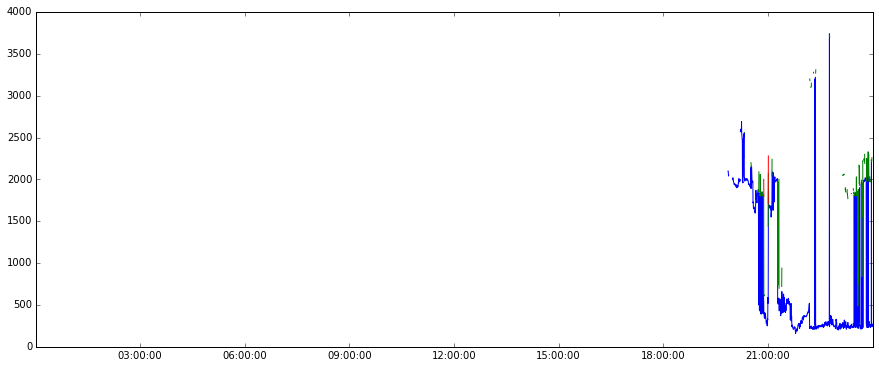

In [11]:
my_fig2 = plt.figure(figsize=[15,6])
print(ceil_dataset.variables['first_cbh'].units)
print(ceil_dataset.variables['time'].units)
plt.plot(ceil_dtimes, 
         ceil_dataset.variables['first_cbh'][:])
plt.plot(ceil_dtimes,
         ceil_dataset.variables['second_cbh'][:])
plt.plot(ceil_dtimes,
         ceil_dataset.variables['third_cbh'][:])

plt.xlim([ceil_dtimes.min(), 
          ceil_dtimes.max()])


In [48]:
tsi_filename = '/data/radar/oli_kazr/olitsiskycoverM1.b1.20160715.000000.cdf'
tsi_dataset = netCDF4.Dataset(tsi_filename)
print(tsi_dataset.variables.keys())
tsi_dtimes = netCDF4.num2date(tsi_dataset.variables['time'][:], 
                               tsi_dataset.variables['time'].units)


[u'base_time', u'time_offset', u'time', u'qc_time', u'percent_opaque', u'qc_percent_opaque', u'percent_thin', u'qc_percent_thin', u'sunny', u'qc_sunny', u'sun_strength', u'qc_sun_strength', u'solar_altitude', u'qc_solar_altitude', u'solar_azimuth', u'qc_solar_azimuth', u'region_zenith_count_thin', u'qc_region_zenith_count_thin', u'region_zenith_count_opaque', u'qc_region_zenith_count_opaque', u'region_zenith_count', u'qc_region_zenith_count', u'region_sun_count_thin', u'qc_region_sun_count_thin', u'region_sun_count_opaque', u'qc_region_sun_count_opaque', u'region_sun_count', u'qc_region_sun_count', u'region_horizon_count_thin', u'qc_region_horizon_count_thin', u'region_horizon_count_opaque', u'qc_region_horizon_count_opaque', u'region_horizon_count', u'qc_region_horizon_count', u'count_sub_proczen', u'qc_count_sub_proczen', u'count_opaque', u'qc_count_opaque', u'count_thin', u'qc_count_thin', u'count_box', u'qc_count_box', u'count_sky', u'qc_count_sky', u'count_unknown', u'qc_count_unk

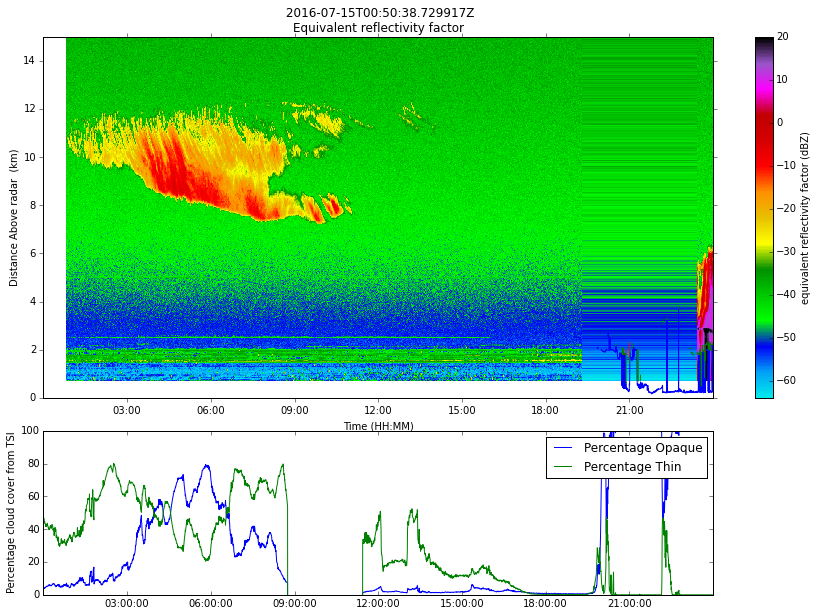

In [55]:
my_display = pyart.graph.RadarDisplay(radar)
my_fig = plt.figure(figsize = [15,10])
ax1 = plt.subplot2grid((3,1), (0,0), rowspan = 2)
ax2 = plt.subplot2grid((3,1), (2,0))

my_display.plot_vpt('reflectivity', vmin=-64, 
                    vmax=20, time_axis_flag=True,
                   ax = ax1)

ax1.plot(ceil_dtimes, 
         ceil_dataset.variables['first_cbh'][:]/1000.0)
ax1.plot(ceil_dtimes,
         ceil_dataset.variables['second_cbh'][:]/1000.0)
ax1.plot(ceil_dtimes,
         ceil_dataset.variables['third_cbh'][:]/1000.0)
ax1.set_ylim([0,15])
ax1.set_xlim([ceil_dtimes.min(), ceil_dtimes.max()])

ax2.plot(tsi_dtimes, 
         tsi_dataset.variables['percent_opaque'][:],
         label='Percentage Opaque' )
ax2.plot(tsi_dtimes, 
         tsi_dataset.variables['percent_thin'][:],
         label='Percentage Thin')


pos1 = ax1.get_position() # get the original position 
pos2 = ax2.get_position()
pos3 = [pos2.x0 , pos2.y0 ,  pos1.width , pos2.height ] 
ax2.set_position(pos3) # set a new position
ax2.set_ylim([0,100])
ax2.set_xlim([ceil_dtimes.min(), ceil_dtimes.max()])
ax2.set_ylabel('Percentage cloud cover from TSI')
ax2.legend()


In [54]:
ax2.legend?